## Import the Libraries

In [30]:
import os
import warnings  
warnings.filterwarnings('ignore')

# importing packages
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn packages
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import gc


from sklearn.model_selection import StratifiedKFold

In [31]:
plt.style.use("seaborn")

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

# Loading the data

In [32]:
#load the train and test data

totaldf_onehot = pd.read_csv("totaldata_onehot.csv")

In [5]:
#load the train data

totaldf_onehot.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,Richards-Walters,RichardsonLtd,RomeroWoodsandJohnson,Sanchez-Robinson,SanchezHaysandWilkerson,SuarezInc,SwansonNewtonandMiller,TaylorHuntandRodriguez,Thornton-Davis,TurnerBaldwinandRhodes
0,train,4.250,214000,360,95,1,22,694,30,0,...,0,0,0,0,0,0,0,0,0,1
1,train,4.875,144000,360,72,1,44,697,0,0,...,0,0,0,0,0,0,1,0,0,0
2,train,3.250,366000,180,49,1,33,780,0,0,...,0,0,0,0,0,0,0,0,1,0
3,train,4.750,135000,360,46,2,44,633,0,638,...,0,0,0,0,0,0,0,0,0,0
4,train,4.750,124000,360,80,1,43,681,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#split the data into train and test

traindf_cleaned = totaldf_onehot[totaldf_onehot["source"] == "train"].drop("source", axis = 1)
testdf_cleaned = totaldf_onehot[totaldf_onehot["source"] == "test"].drop(["source", "m13"], axis = 1)

In [7]:
traindf_cleaned.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,Richards-Walters,RichardsonLtd,RomeroWoodsandJohnson,Sanchez-Robinson,SanchezHaysandWilkerson,SuarezInc,SwansonNewtonandMiller,TaylorHuntandRodriguez,Thornton-Davis,TurnerBaldwinandRhodes
0,4.250,214000,360,95,1,22,694,30,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.875,144000,360,72,1,44,697,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.250,366000,180,49,1,33,780,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.750,135000,360,46,2,44,633,0,638,0,...,0,0,0,0,0,0,0,0,0,0
4,4.750,124000,360,80,1,43,681,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
testdf_cleaned.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,Richards-Walters,RichardsonLtd,RomeroWoodsandJohnson,Sanchez-Robinson,SanchezHaysandWilkerson,SuarezInc,SwansonNewtonandMiller,TaylorHuntandRodriguez,Thornton-Davis,TurnerBaldwinandRhodes
116058,3.875,417000,360,75,1,20,790,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116059,4.500,113000,360,80,2,33,793,0,784,0,...,0,0,0,0,0,0,0,0,0,0
116060,4.500,72000,360,75,1,34,710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116061,4.125,123000,180,41,2,24,798,0,813,0,...,0,0,0,0,0,0,0,0,0,0
116062,3.250,166000,180,53,2,12,767,0,768,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
submission_df = pd.read_csv("data/sample_submission.csv")

In [13]:
submission_df.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [56]:
def kfold_lightgbm(train_df, test_df, submission_df,num_folds=3, stratified = True):
    dt_preds = {}
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ["m13"]]
    
    print(feats)
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, train_df['m13'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['m13'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['m13'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'f1', verbose= 200, early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        dt_preds[n_fold + 1] = clf.predict(valid_x)
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        print('Fold %2d F1 : %.6f' % (n_fold + 1, metrics.f1_score(valid_y, dt_preds[n_fold + 1])))
        
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['m13'], oof_preds))
    # Write submission file and plot feature importance
    
    display_importances(feature_importance_df)
    return feature_importance_df, dt_preds

In [57]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    #plt.savefig('lgbm_importances01.png')


Starting LightGBM. Train shape: (116058, 53), test shape: (35866, 52)
['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'unpaid_balance_day', 'origination_month', 'origination_year', 'orignation_weekday', 'first_payment_month', 'first_payment_year', 'first_payment_weekday', 'gap_days', 'loan_A23', 'loan_B12', 'loan_C86', 'Anderson-Taylor', 'Browning-Hart', 'Chapman-Mcmahon', 'ColeBrooksandVincent', 'Edwards-Hoffman', 'MartinezDuffyandBird', 'MillerMcclureandAllen', 'NicholsonGroup', 'OTHER', 'Richards-Walters', 'RichardsonLtd', 'RomeroWoodsandJohnson', 'Sanchez-Robinson', 'SanchezHaysandWilkerson', 'SuarezInc', 'SwansonNewtonandMiller', 'TaylorHuntandRodriguez', 'Thornton-Davis', 'TurnerBaldwinandRhodes']
Training until validation scores don't improve fo

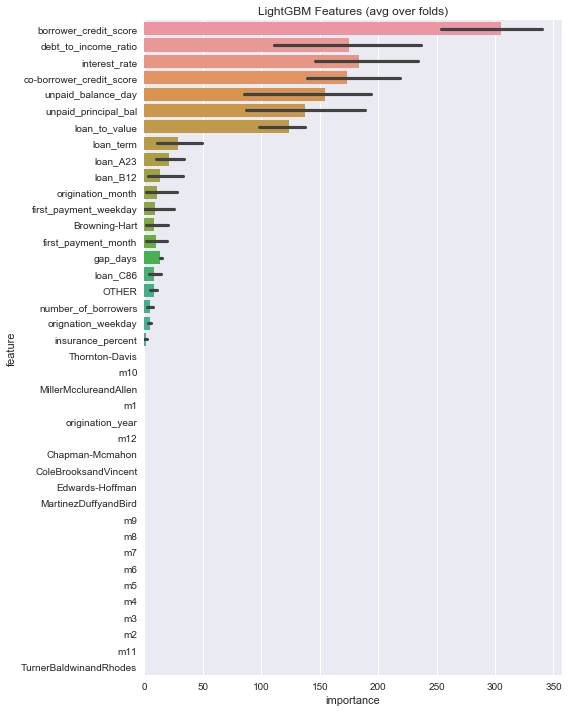

In [58]:
feature_df, preds =  kfold_lightgbm(traindf_cleaned, testdf_cleaned, submission_df, 3, True)

In [54]:
pd.Series(preds).map( lambda x: 1 if x >= 0.2 else 0 ).value_counts()

0    35866
dtype: int64

In [55]:
preds.value_counts()

0    35866
dtype: int64